import neccessay packages

In [16]:
import pypylon.pylon as py
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import statistics

In [17]:
camera = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()
camera.ExposureAuto.SetValue("Continuous")
camera.GainAuto.SetValue("Continuous")
camera.StartGrabbing(1)
grab = camera.RetrieveResult(2000, py.TimeoutHandling_ThrowException)


once the image is grabbed, do binary thresholding and get find the contours

In [18]:
if grab.GrabSucceeded():
    img = grab.Array
    _,thresh1 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    x_array = []
    y_array = []
else:
    print("grab not done")


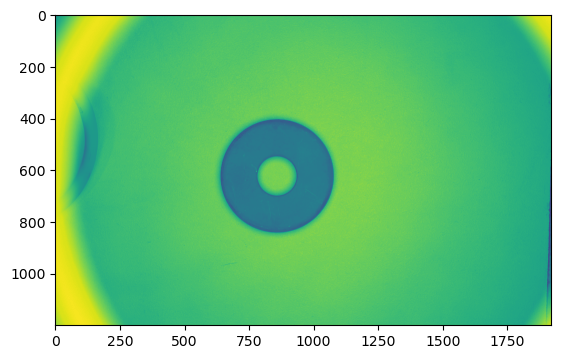

In [19]:
plt.imshow(img)

append the x points of contours in x_array and y points of contours in y_array

In [20]:
for contour in contours:
    area = cv2.contourArea(contour)
    if 100000 < area < 1000000:
                      
        (x,y),mn_radius = cv2.minEnclosingCircle(contour)
        for i in contour:
            x_array.append(i[0][0])
            y_array.append(i[0][1])

find the length of the contour and append all other contour points as (x,y) in rad_points array. calculate the radius btw the rad_points(contour points) and the centre and append the values in rad array.

In [21]:
num_contours = len(x_array)
rad_points = [(x_array[i],y_array[i]) for i in range(num_contours)]
centre = [x,y]
rad = [math.dist(point,centre) for point in rad_points]

now find the average radius by taking mean of all the values in rad array
also find error using err = (aprox.value - absol.value) / (absol.value) 

In [22]:
#for getting the avg rad
avg_rad=statistics.mean(rad)
err=(avg_rad-mn_radius)/(mn_radius)

    


Text(0, 0.5, '------radius in mm------->')

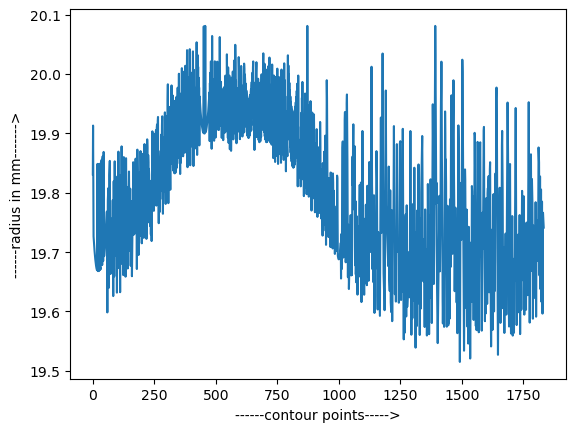

In [23]:
rad_np=np.array(rad)
rad_npmm=rad_np*0.09
plt.plot(rad_npmm)
plt.xlabel('------contour points----->')
plt.ylabel('------radius in mm------->')

In [24]:
#now convert pixel value to absolute scale value, 
#from previous calibration it is found that 1px = 0.09mm

In [25]:
print("The number of contour points are: ",num_contours)
print("The radius found using minEnclosingCircle: ",mn_radius*0.09)
print("The mean radius found through plotting the contours is : ",avg_rad*0.09)
print("The error is around ",err*100)



The number of contour points are:  1834
The radius found using minEnclosingCircle:  20.080783081054687
The mean radius found through plotting the contours is :  19.803470384840132
The error is around  -1.380985468022845


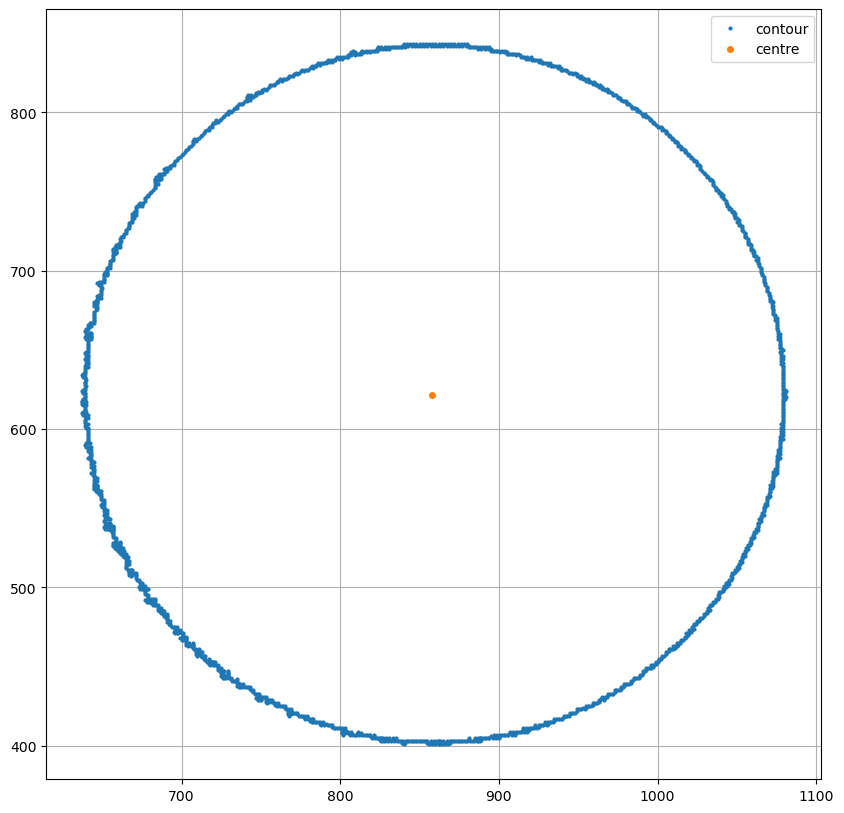

In [26]:
#plot the contour and plot all the radius
plt.figure(figsize=(10,10))
plt.plot(x_array,y_array,'o',markersize=2,label='contour')
plt.plot(x,y,'o',markersize=4,label='centre')
#for i in range(num_contours):
    #plt.plot([x,rad_points[i][0]],[y,rad_points[i][1]])

plt.grid()
plt.legend()
plt.show()


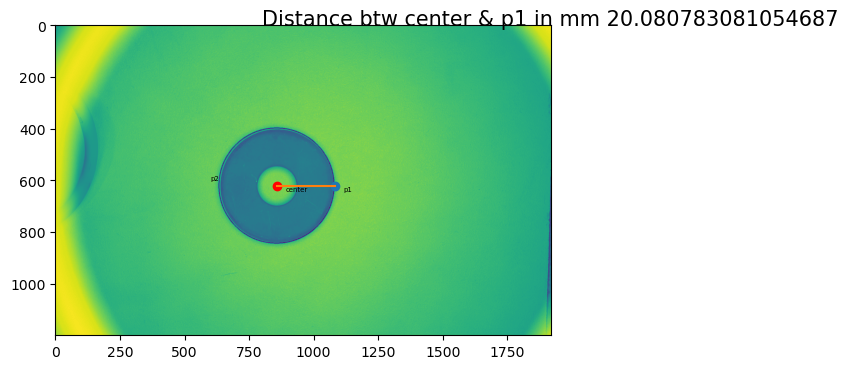

In [27]:
center = (int(x),int(y))
rad= int(mn_radius)

cv2.circle(img,center,rad,(0,255,0),2)
plt.imshow(img)
c1 = x + rad
c2 = y 
c3 = x - rad
c4 = y
plt.text(int(x)+35, int(y)+20, 'center', fontsize = 5)
plt.text(int(c1)+35,int(c2)+20, 'p1',fontsize=5)
plt.text(int(c3)-35,int(c4)-20, 'p2',fontsize=5)
plt.text(800,0,f'Distance btw center & p1 in mm { mn_radius*0.09 }',fontsize=15)
plt.plot(x,y,'ro',c1,c2,'o')
plt.plot([x,c1],[y,c2])

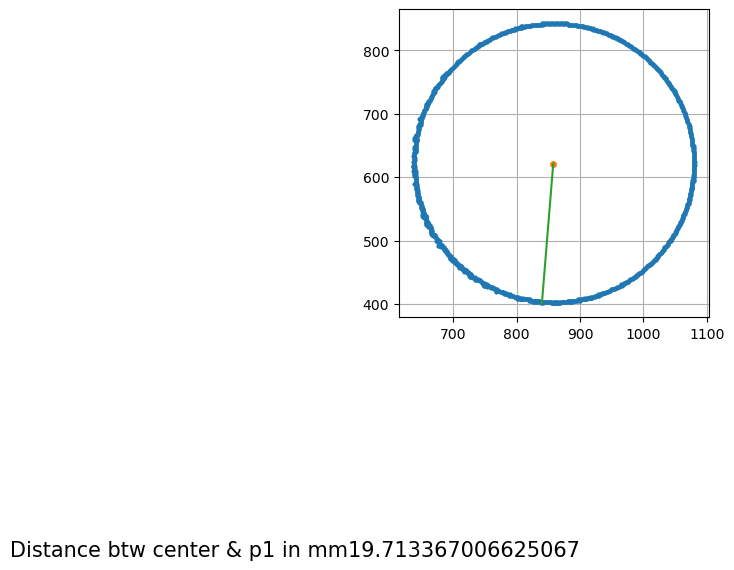

In [29]:
plt.figure(figsize=(4,4))
random_rad=rad_np[5]*0.09
plt.text(2,2, f'Distance btw center & p1 in mm{random_rad}', fontsize=15)
plt.plot(x_array,y_array,'o',markersize=2,label='contour')
plt.plot(x,y,'o',markersize=4,label='centre')

plt.plot([x,rad_points[1][0]],[y,rad_points[1][1]])

plt.grid()
plt.show()